# **Data Visualisation**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Import Libraries

Libraries for visualizations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


---

# Matplotlib charts

In [67]:
# read the sales data
df = pd.read_csv("C:\\Users\\marka\\ILP_Retail\\ILP-Retail\\Dataset\\Processed\\retail_processed.csv",low_memory=False)


In [65]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,UK_Customer,Cancels
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,True,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,True,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,True,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,True,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,True,NaN


In [66]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
Sales          float64
UK_Customer       bool
Cancels        float64
dtype: object

Test if the quantity sold of a product (StockCode) increases as the avg unit price decreases
- plot 
- matplotlib - scatter
- documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- 
Sales trends UK vs ROW
sales trend by Country?
if we exclude UK - which are up and coming?

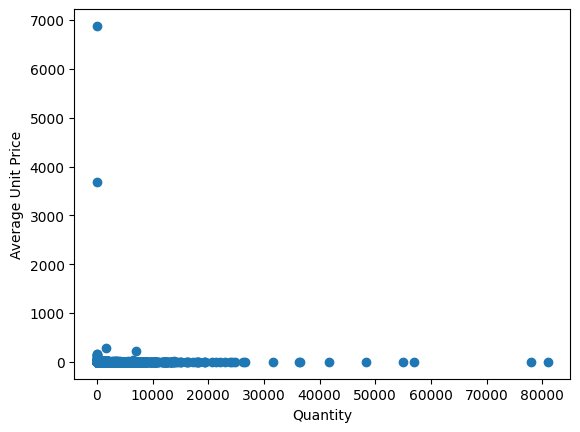

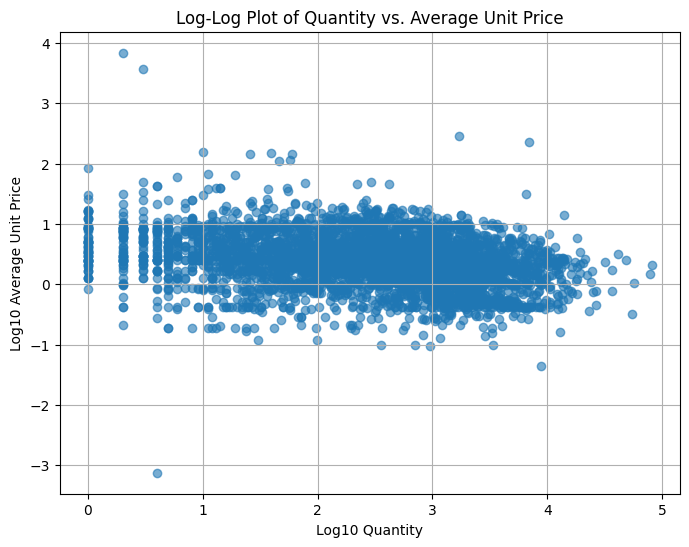

In [75]:
import matplotlib.pyplot as plt
import numpy as np

df['Average Unit Price'] = df['Sales'] / df['Quantity']

# Need a point for each StockCode
# Aggregate per StockCode
agg = df.groupby('StockCode').agg({
    'Quantity':'sum',
    'Average Unit Price':'mean'
}).reset_index()

plt.scatter(agg['Quantity'], agg['Average Unit Price'])
plt.xlabel('Quantity')
plt.ylabel('Average Unit Price')
#plt.show()

# take the log of x and Y

# Filter out non-positive values before log transform
agg = agg[(agg['Quantity'] > 0) & (agg['Average Unit Price'] > 0)]

# Apply log10 transform
agg['log_Quantity'] = np.log10(agg['Quantity'])
agg['log_AvgPrice'] = np.log10(agg['Average Unit Price'])

# Plot log-log scatter
plt.figure(figsize=(8, 6))
plt.scatter(agg['log_Quantity'], agg['log_AvgPrice'], alpha=0.6)
plt.xlabel('Log10 Quantity')
plt.ylabel('Log10 Average Unit Price')
plt.title('Log-Log Plot of Quantity vs. Average Unit Price')
plt.grid(True)
plt.show()


This shows that in general the quantity sold of a product (StockCode) increases as the avg unit price decreases

Are some countries dominant in terms of sales?
What is the distribution by number of transactions by Country?

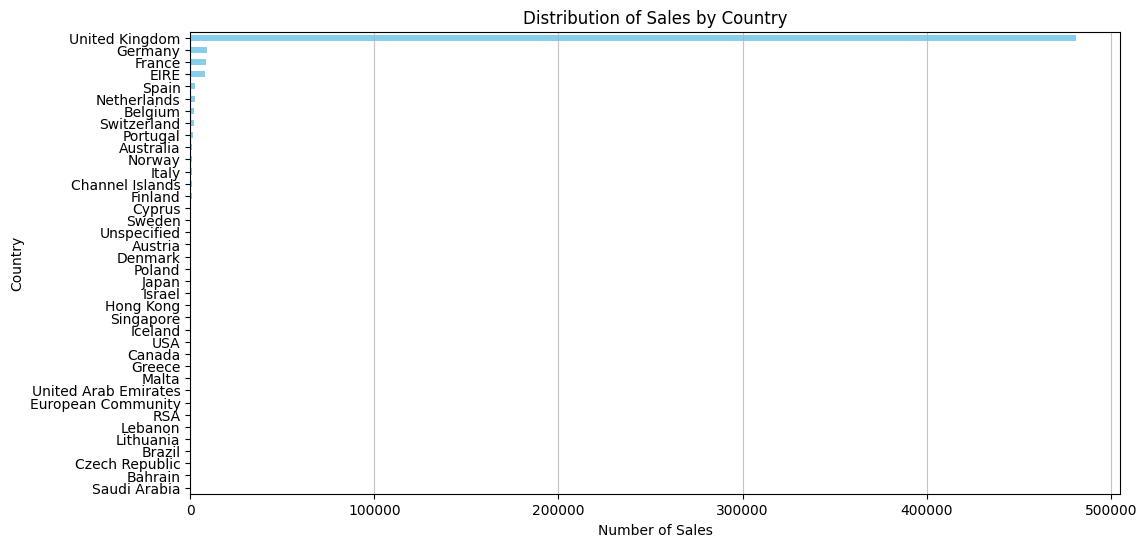

In [76]:
# Create a horizontal bar chart to illustrate
# sorted high to low on Number of Sales
country_sales = df['Country'].value_counts().sort_values(ascending=True)
# plot the distribution
plt.figure(figsize=(12,6))
country_sales.plot(kind='barh', color='skyblue')
plt.title('Distribution of Sales by Country')
plt.xlabel('Number of Sales')
plt.ylabel('Country')
plt.grid(axis='x', alpha=0.75)
plt.show()


The UK is clearly dominant with the vast majority of transactions

# Seaborn charts

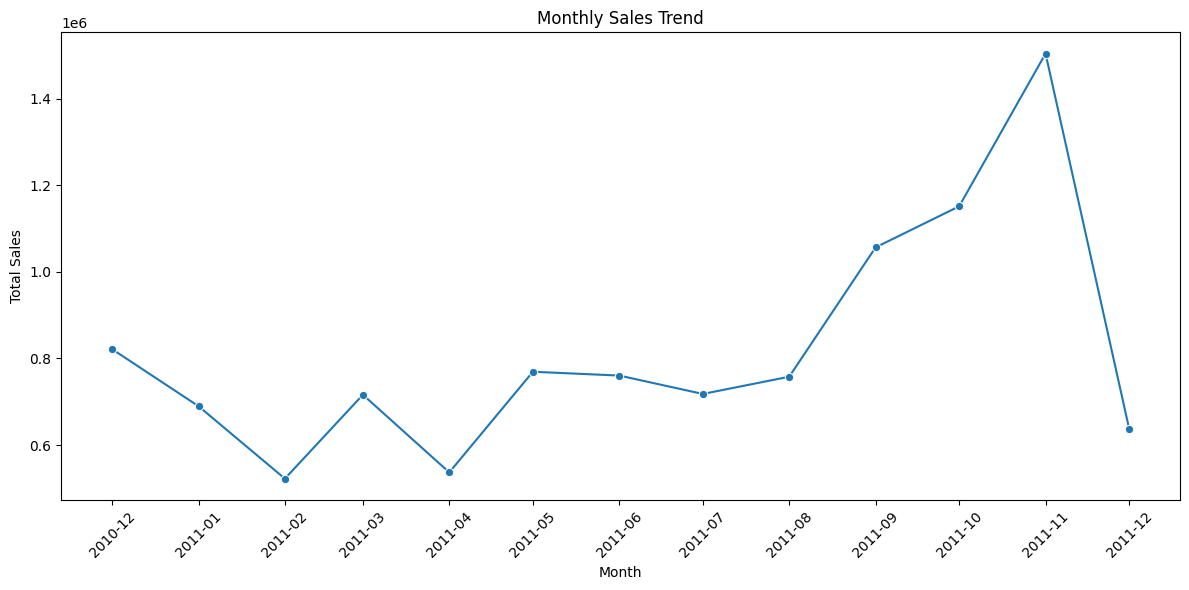

In [86]:
# Does Sales increase over time? What is the monthly trend?

# get the month of the InvoiceDate separately
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Extract Year-Month as a month period
df["InvoiceYearMonth"] = df["InvoiceDate"].dt.to_period("M")

# Aggregate sales by month
monthly_sales = df.groupby("InvoiceYearMonth")["Sales"].sum().reset_index()

# Convert back to datetime for plotting
monthly_sales["InvoiceYearMonth"] = monthly_sales["InvoiceYearMonth"].dt.to_timestamp()

# Use a seaborn line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="InvoiceYearMonth", y="Sales", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(
    ticks=monthly_sales["InvoiceYearMonth"],
    labels=monthly_sales["InvoiceYearMonth"].dt.strftime("%Y-%m"),
    rotation=45
)
plt.tight_layout()
plt.show()

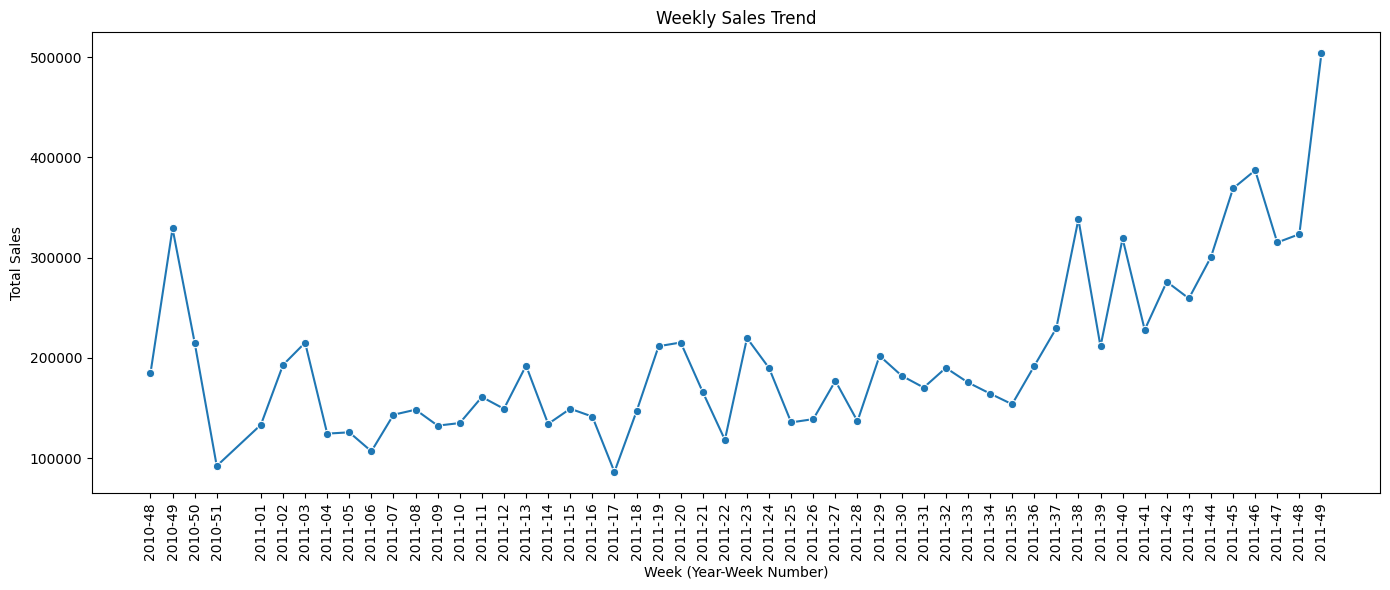

In [ ]:
# Weekly sales?
# Extract Year-Week
df["InvoiceYearWeek"] = df["InvoiceDate"].dt.to_period("W")

# Aggregate sales by week
weekly_sales = df.groupby("InvoiceYearWeek")["Sales"].sum().reset_index()

# Convert back to datetime for plotting
weekly_sales["InvoiceYearWeek"] = weekly_sales["InvoiceYearWeek"].dt.start_time

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_sales, x="InvoiceYearWeek", y="Sales", marker="o")

# Show all week labels
plt.xticks(
    ticks=weekly_sales["InvoiceYearWeek"],
    labels=weekly_sales["InvoiceYearWeek"].dt.strftime("%Y-%W"),
    rotation=90
)

plt.title("Weekly Sales Trend")
plt.xlabel("Week (Year-Week Number)")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

This shows a clear increase in sales over the weeks and a spike in sales just before Christmas in the two years.

Is there a relationship between Day of the Week and time of day for sales?
Suspect that there are more sales at the weekend.
We can focus on UK sales

---

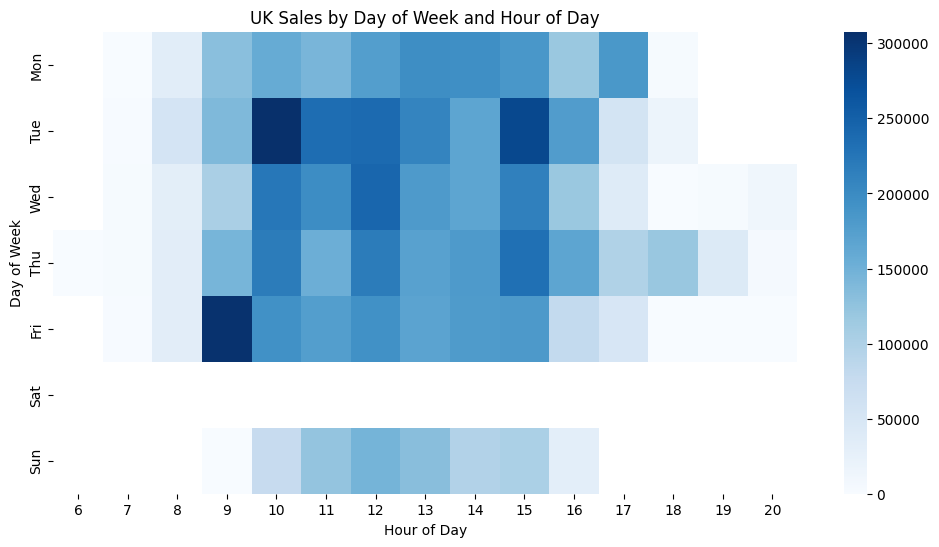

In [ ]:
# get UK 
df_uk = df[df["Country"] == "United Kingdom"].copy()

# Extract day of week and hour
# Monday = 0, Sunday = 6
df_uk["DayOfWeek"] = df_uk["InvoiceDate"].dt.dayofweek # https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html
df_uk["Hour"] = df_uk["InvoiceDate"].dt.hour

# Map day numbers to names for readability - method suggested by Copilot
day_map = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
df_uk["DayName"] = df_uk["DayOfWeek"].map(day_map)

# Aggregate total sales
sales_heatmap = df_uk.groupby(["DayName", "Hour"])["Sales"].sum().reset_index()

# Pivot for heatmap format
sales_pivot = sales_heatmap.pivot(index="DayName", columns="Hour", values="Sales")

# Order days correctly
day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sales_pivot = sales_pivot.reindex(day_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, cmap="Blues")
plt.title("UK Sales by Day of Week and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Conclusions and Next Steps

My conclusions and next steps.